In [200]:
from sklearn.datasets import make_classification
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [322]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

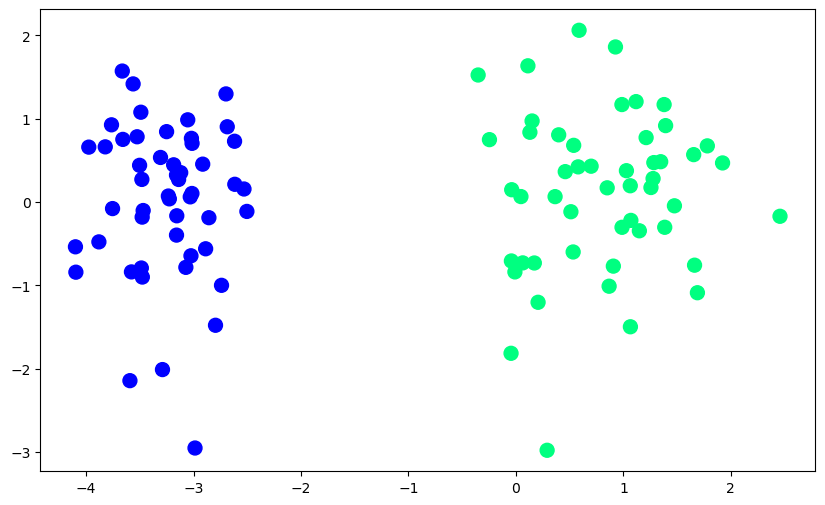

In [323]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [324]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [325]:
def step(z):
    return 1 if z>0 else 0

In [326]:
intercept_,coef_=perceptron(X,y)

In [327]:
print(intercept_,coef_)

1.3000000000000003 [1.05343617 0.2221512 ]


In [328]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])


In [329]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

In [330]:
lr=LogisticRegression(penalty='none',solver='sag')
lr.fit(X,y)

/Users/prerak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/prerak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [331]:
print(lr.coef_,lr.intercept_)

[[4.84074998 0.22264818]] [5.81347735]


In [332]:
m=-(lr.coef_[0][0]/lr.coef_[0][1])
b=-(lr.intercept_/lr.coef_[0][1])

In [333]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

(-3.0, 2.0)

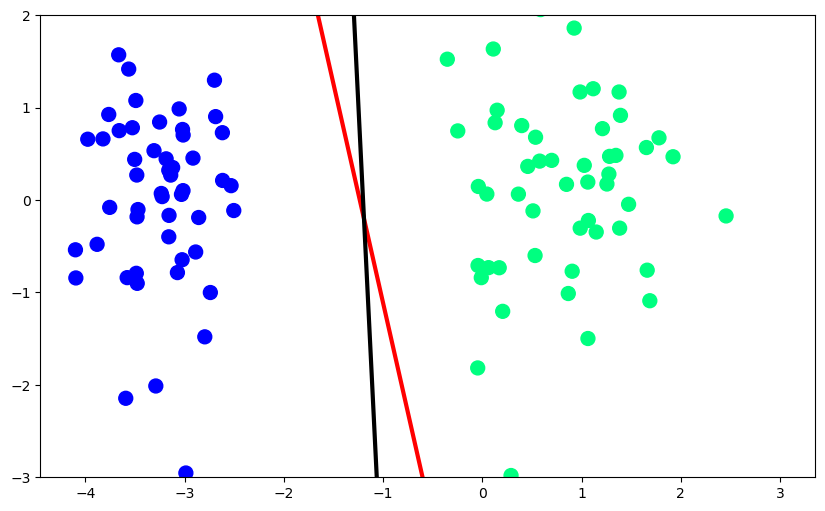

In [334]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
# plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [335]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X[j],weights))
        weights=weights+(lr*(y[j]-y_hat))*X[j]
    return weights[0],weights[1:]
    

In [336]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

In [337]:
intercept_,coef_=perceptron(X,y)

In [338]:
print(intercept_,coef_)

2.7751204383705548 [2.8318604 0.1333355]


In [339]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])


x_input2=np.linspace(-3,3,100)
y_input2=m*x_input2 +b

(-3.0, 2.0)

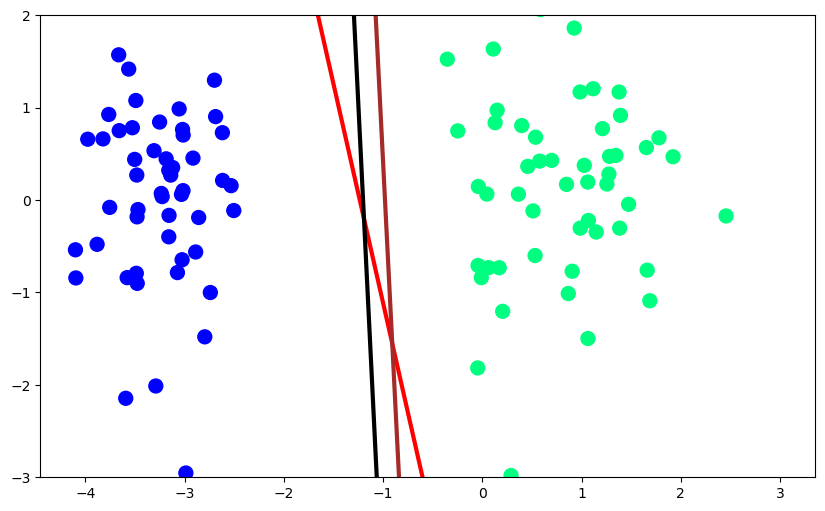

In [340]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [347]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

    

In [348]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

In [349]:
coef_,intercept_=gd(X,y)

In [350]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])


x_input3=np.linspace(-3,3,100)
y_input3=m*x_input3 +b

(-3.0, 2.0)

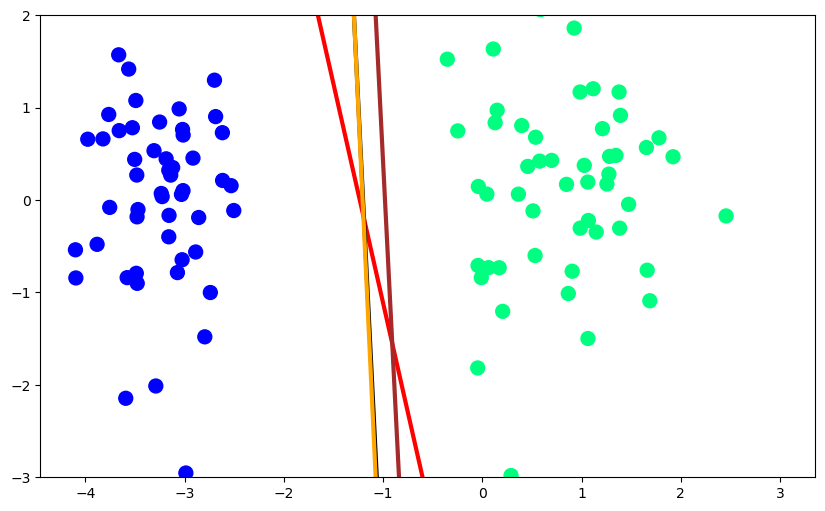

In [351]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.plot(x_input3,y_input3,color='orange',linewidth=3)

plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [352]:
# orange and black overlap reached the state of the sklearns accuracy